#### Step 1 - Data Understanding

In [977]:
import warnings
warnings.filterwarnings('ignore')

In [978]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
from datetime import datetime

In [979]:
# reading the file 'train'
df = pd.read_csv('train.csv')

In [980]:
# explored the top 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [981]:
# explored the overall shape of the dataframe
df.shape

(1460, 81)

In [982]:
# checked column data types and number of non-null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Observation - 

3 columns are of float type,
35 columns are of int type, and
43 columns are of object type

In [983]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [984]:
# Checking the numerical Variables
numerical_variables = list(df.describe().columns)
numerical_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [985]:
# Program to identify the numerical variables that are good candidates to be converted to Object
# Initiated a blank list
Candidate_Objects = []
for i in numerical_variables:
    if df[i].nunique() < 25: # checked if the number of unique entries for variable i is less than 10
        Candidate_Objects.append(i)

In [986]:
# list of candidates that can be converted to Object type 
Candidate_Objects

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Observation after assessing all the candidate variables

1. Following variables need to be converted to Object Data Type 

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

2. Following variables should be continuous as they are either area type or dollar value. But there is a problem, there are very few non zero entries for these variables. Making them highly skewed.. We have analyzed this below - 
> 'LowQualFinSF'
> '3SsnPorch'
> 'PoolArea'
> 'MiscVal'

3. MoSold and YrSold are date time information but are defined as Object. We will assess all the Columns to identify the ones that should fit as Date time..
 

In [987]:
# Converted datatype to type Object
df.MSSubClass = df.MSSubClass.astype(object)
df.OverallQual = df.OverallQual.astype(object)
df.OverallCond = df.OverallCond.astype(object)
df.BsmtFullBath = df.BsmtFullBath.astype(object)
df.BsmtHalfBath = df.BsmtHalfBath.astype(object)
df.FullBath = df.FullBath.astype(object)
df.HalfBath = df.HalfBath.astype(object)
df.BedroomAbvGr = df.BedroomAbvGr.astype(object)
df.KitchenAbvGr = df.KitchenAbvGr.astype(object)
df.TotRmsAbvGrd = df.TotRmsAbvGrd.astype(object)
df.Fireplaces = df.Fireplaces.astype(object)
df.GarageCars = df.GarageCars.astype(object)


In [988]:
# Checking the Skeweness for 'LowQualFinSF'
df['LowQualFinSF'].value_counts().iloc[0]/len(df)

0.9821917808219178

In [989]:
# Checking the Skeweness for 'MiscVal'
df['MiscVal'].value_counts().iloc[0]/len(df)

0.9643835616438357

In [990]:
# Checking the Skeweness for 'PoolArea'
df['PoolArea'].value_counts().iloc[0]/len(df)

0.9952054794520548

In [991]:
# Checking the Skeweness for '3SsnPorch'
df['3SsnPorch'].value_counts().iloc[0]/len(df)

0.9835616438356164

In [992]:
# Dropped the 4 variables - 'LowQualFinSF', 'MiscVal', 'PoolArea', '3SsnPorch' as they are skewed heavily despite being a continuous variable

df.drop(['LowQualFinSF','MiscVal','PoolArea','3SsnPorch'], axis=1, inplace=True)

#### Observations after looking through the data dictionary, data type and number of unique values

1. 5 Columns are of type float but are capturing Date / time information. These Columns are converted to relevant derived columns in the relevant section

> YearBuilt 

> YearRemodAdd

> MoSold

> YrSold

> GarageYrBlt


#### Missing value treatment 
Objective - Handling Missing values

In [993]:
# Identified the cells having more than 80% missing variables
missing_variables = round(100*df.isnull().sum()/len(df),2)
missing_variables[missing_variables.values>80]

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [994]:
# Dropping these 4 columns - Alley, PoolQC, Fence, MiscFeature
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [995]:
# Identified cells having missing variables
missing_variables = round(100*df.isnull().sum()/len(df),2)
missing_variables[missing_variables.values>0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

##### Columns having missing values, their data types and comment for missing value treatment
1. A Missing value for the following attributes represent absence of feature. So, missing data also carries a meaning.We will replace all the missing values by 'FNP' that means 'feature not present'.  <br>

BsmtQual - Object <br>
BsmtCond - Object <br>
BsmtExposure - Object <br>
BsmtFinType1 - Object <br>
BsmtFinType2 - Object <br>
FireplaceQu - Object <br>
GarageType - Object <br>
GarageFinish - Object <br>
GarageQual - Object  <br>
GarageCond - Object <br>

2. A missing value for the following attributes needs treatment. We will examine the below one by one to identify what kind of treatment is required.<br>

LotFrontage <br>
MasVnrType  <br>
MasVnrArea  <br>
Electrical  <br>
GarageYrBlt <br>

In [996]:
# Treating missing values with 'FNP' which stands for feature not present. So, a FNP entry in 'Alley' represents 'No Alley Access'

df.loc[:, "BsmtQual"] = df['BsmtQual'].fillna('FNP')
df.loc[:, "BsmtCond"] = df['BsmtCond'].fillna('FNP')
df.loc[:, "BsmtExposure"] = df['BsmtExposure'].fillna('FNP')
df.loc[:, "BsmtFinType1"] = df['BsmtFinType1'].fillna('FNP')
df.loc[:, "BsmtFinType2"] = df['BsmtFinType2'].fillna('FNP')
df.loc[:, "FireplaceQu"] = df['FireplaceQu'].fillna('FNP')
df.loc[:, "GarageType"] = df['GarageType'].fillna('FNP')
df.loc[:, "GarageFinish"] = df['GarageFinish'].fillna('FNP')
df.loc[:, "GarageQual"] = df['GarageQual'].fillna('FNP')
df.loc[:, "GarageCond"] = df['GarageCond'].fillna('FNP')

In [997]:
# Now lets look at the missing values again

# Checking the missing values
df2 = round(100*df.isnull().sum()/len(df),2)
# printing columns with missing values
df2[df2.values > 0]

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [998]:
# continuous variables imputed with the median
df.loc[:, "LotFrontage"] = df['LotFrontage'].fillna(df.LotFrontage.median())
df.loc[:, "MasVnrArea"] = df['MasVnrArea'].fillna(df.MasVnrArea.median())
# category variables imputed with the mode
df.loc[:, "MasVnrType"] = df['MasVnrType'].fillna(df.MasVnrType.mode().iloc[0])
df.loc[:, "Electrical"] = df['Electrical'].fillna(df.Electrical.mode().iloc[0])

In [999]:
# GarageYrBlt also has missing value. Since some houses has no Garage.. we need to examine which entries has missing values..

df[df.GarageType != 'FNP'].GarageYrBlt.isnull().sum()

0

**Observation** - 'GarageYrBlt' is missing for houses with no garage 

In [1000]:
# Created one columns GarageAge to indicate the age of Garages. 
df.loc[:, "GarageAge"] = df["GarageYrBlt"].apply(lambda x: 2020 - x)

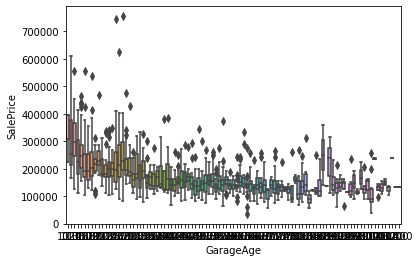

In [1001]:
# plotted GarageAge against SalePrice to see how price varies with age of garage.. 
ax = sns.boxplot(x="GarageAge", y="SalePrice", data=df)

Inference - SalePrice reduces with GarageAge.. 

`So, the houses having no Garage should have a GarageAge that is very large for that Garage to become economically invaluable`. Such a Old GarageAge will have no impact on the SalePrice

In [1002]:
# estimating the max GarageAge for the dataset
df.GarageAge.max()

120.0

In [1003]:
# imputed the missing values in GarageAge to 150. Assuming that a very large age can be approximated to no Garage.. (it is so old that it has no impact on price)
df.loc[:, "GarageAge"] = df['GarageAge'].fillna(150)

In [1004]:
# Column title 'ID' is not helpful in building model, so we can drop it
# GarageYrBlt is also dropped as is is used to arrive at a derived variable 'GarageAge'
df.drop(['Id'], axis=1, inplace=True)
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [1005]:
# Checking the missing values
round(100*df.isnull().sum()/len(df),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

#### Pruning Categorical variables - 
Objective - identification of categorical variables that are skewed heavily. and, dropping them post identification

In [1006]:
# looked for all data of type object
params_object =  list(df.select_dtypes(include='object').columns)
params_object

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1007]:
# looked for the % distribution of categorical variables to find variables that are heavily skewed. 
# Such variables will not be needed for further modelling
# Considered 70% as the threshold for skewness above which the variable will be dropped 

skewed_list = []
for i in params_object:
    if ((df[i].value_counts().iloc[0] / len(df)) > 0.8):
        print (i, round(df[i].value_counts().iloc[0]/ len(df),2))  
        skewed_list.append(i)

Street 1.0
LandContour 0.9
Utilities 1.0
LandSlope 0.95
Condition1 0.86
Condition2 0.99
BldgType 0.84
RoofMatl 0.98
ExterCond 0.88
BsmtCond 0.9
BsmtFinType2 0.86
Heating 0.98
CentralAir 0.93
Electrical 0.91
BsmtHalfBath 0.94
KitchenAbvGr 0.95
Functional 0.93
GarageQual 0.9
GarageCond 0.91
PavedDrive 0.92
SaleType 0.87
SaleCondition 0.82


In [1008]:
# created a list that has all the skewed categorical variables
len(skewed_list)

22

In [1009]:
# Dropped the columns having attributes that are skewed in their distribution
df.drop(skewed_list, axis=1, inplace = True)

#### Now, lets looks at the 4 date variables (Note: we have already removed GarageYrBuilt and replaced with GarageAge)

> YearBuilt 

> YearRemodAdd

> MoSold

> YrSold

Objective - handling the Date variables

In [1010]:
# Derived 'age_since_built' and 'age_since_remodeled' variables 

df.loc[:, "age_since_built"] = df["YearBuilt"].apply(lambda x: 2020 - x)
df.loc[:, "age_since_remodeled"] = df["YearRemodAdd"].apply(lambda x: 2020 - x)

# and, then dropped the 'YearBuilt' & 'YearRemodAdd'

df.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)


In [1011]:
# Checked df
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,GarageAge,age_since_built,age_since_remodeled
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,FNP,Attchd,RFn,2,548,0,61,0,0,2,2008,208500,17.0,17,17
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,5,2007,181500,44.0,44,44
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,9,2008,223500,19.0,19,18
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,2,2006,140000,22.0,105,50
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,12,2008,250000,20.0,20,20


In [1012]:
# left with two more variables of Date type - 'MoSold', 'YrSold'

df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [1013]:
df.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [1014]:
#df['SoldDate'] = pd.to_datetime(df.YrSold.astype(str) + '-' + df.MoSold.astype(str))

df['SoldDate'] = (df.YrSold.astype(str) + '-' + df.MoSold.astype(str))

In [1015]:
# checked the data type
df.SoldDate.dtype

dtype('O')

In [1016]:
# converted the data type to date time type
df['SoldDate'] = df['SoldDate'].astype('datetime64[ns]') 

In [1017]:
# Checked the derived Column 'SoldDate'
df['SoldDate']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Name: SoldDate, Length: 1460, dtype: datetime64[ns]

In [1018]:
# Calculated a column for MonthsSinceSold (till June 2020)
df['today'] = pd.Timestamp('20200701')
df['MonthsSinceSold'] = ((df['today']- df['SoldDate']).map(lambda x: round(x.days/30)))

In [1019]:
# and, then dropped the 'YrSold','MoSold', 'today' & 'SoldDate'

df.drop(['YrSold','MoSold', 'today', 'SoldDate'], axis=1, inplace=True)

In [1020]:
df['MonthsSinceSold']

0       151
1       160
2       144
3       175
4       141
       ... 
1455    157
1456    127
1457    124
1458    125
1459    147
Name: MonthsSinceSold, Length: 1460, dtype: int64

#### EDA

Objective - Lets do some EDA analysis on the variables to find out which ones make sense for model building

In [1021]:
# all numerical variables (int & float)
df_numerical = list(df.describe().columns)
len(df_numerical)

20

In [1022]:
# Since the number of numerical variables are 20 - lets divide it in 2 sets for interpretations to look at the relation with SalePrice
df_numerical1 = df_numerical[0:9]
df_numerical2 = df_numerical[10:19]

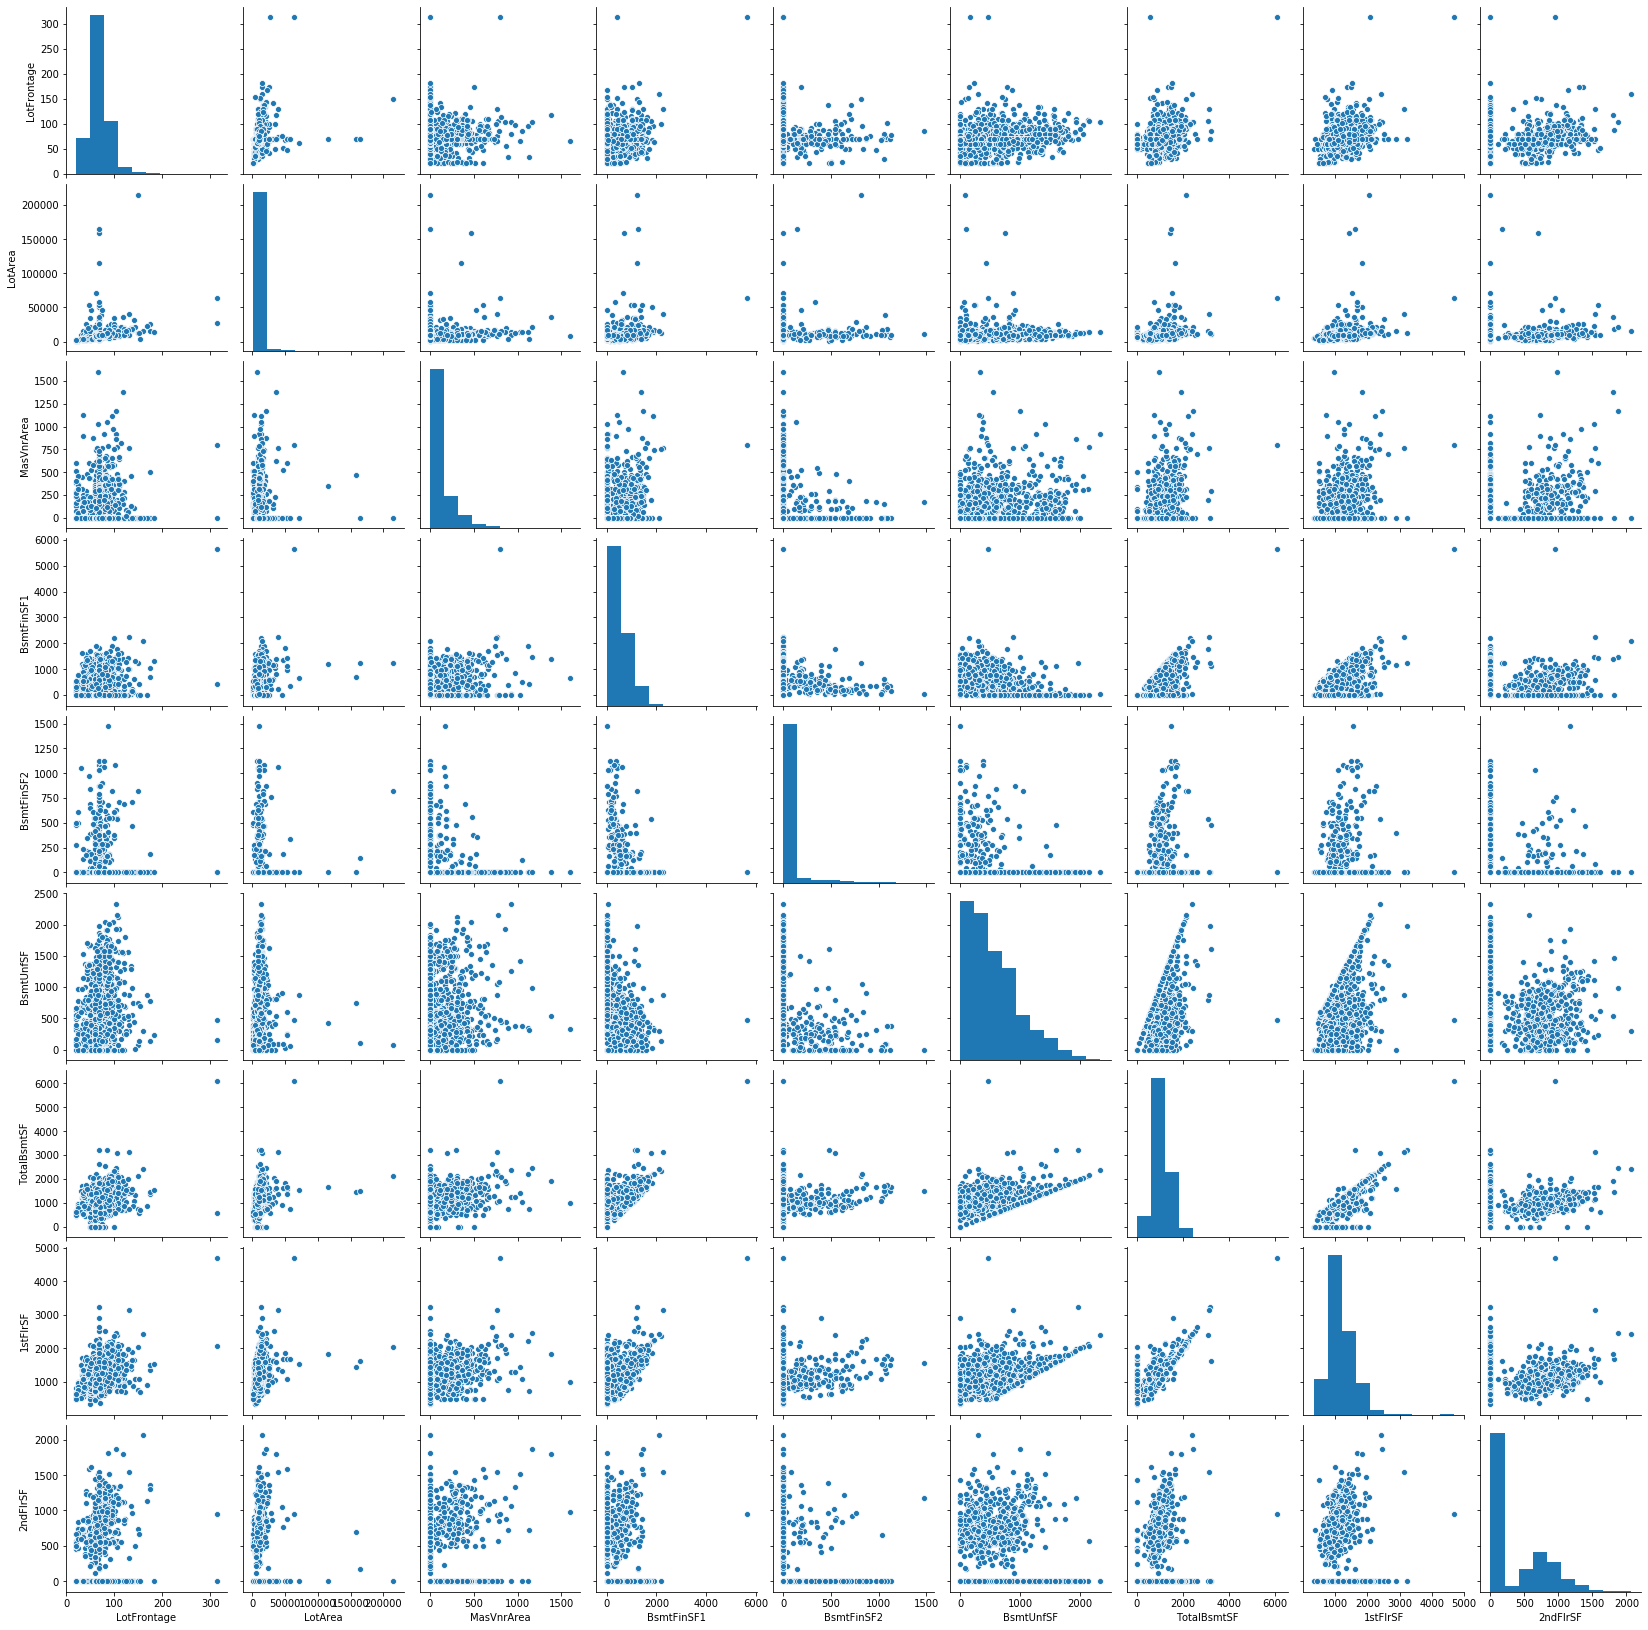

In [1023]:
# ploteed the pairwise scatter plots for Set1  
sns.pairplot(df[df_numerical1])

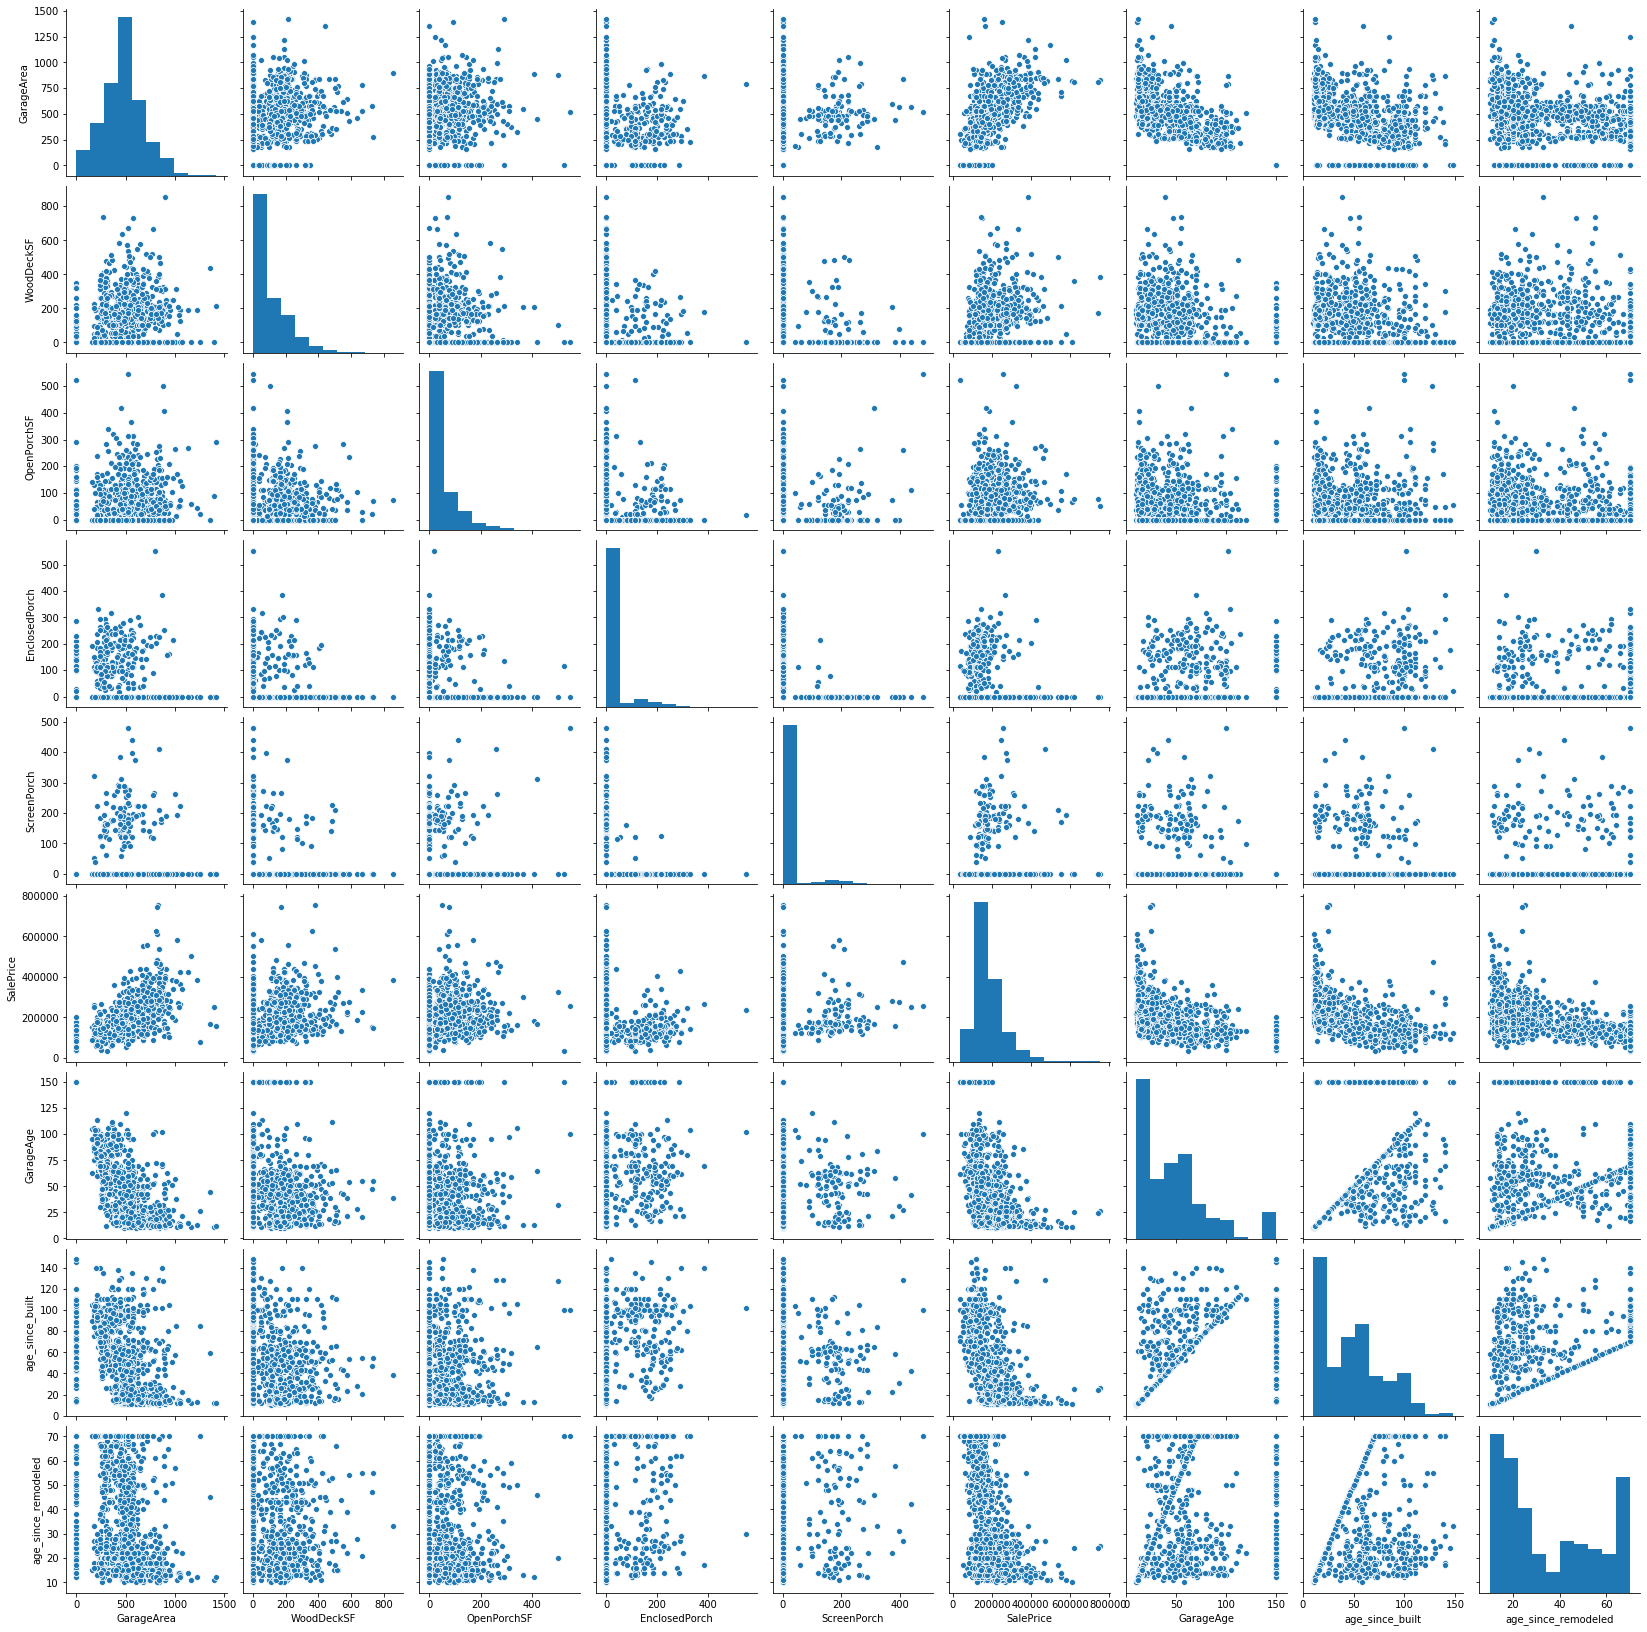

In [1024]:
# ploteed the pairwise scatter plots for Set2  
sns.pairplot(df[df_numerical2])

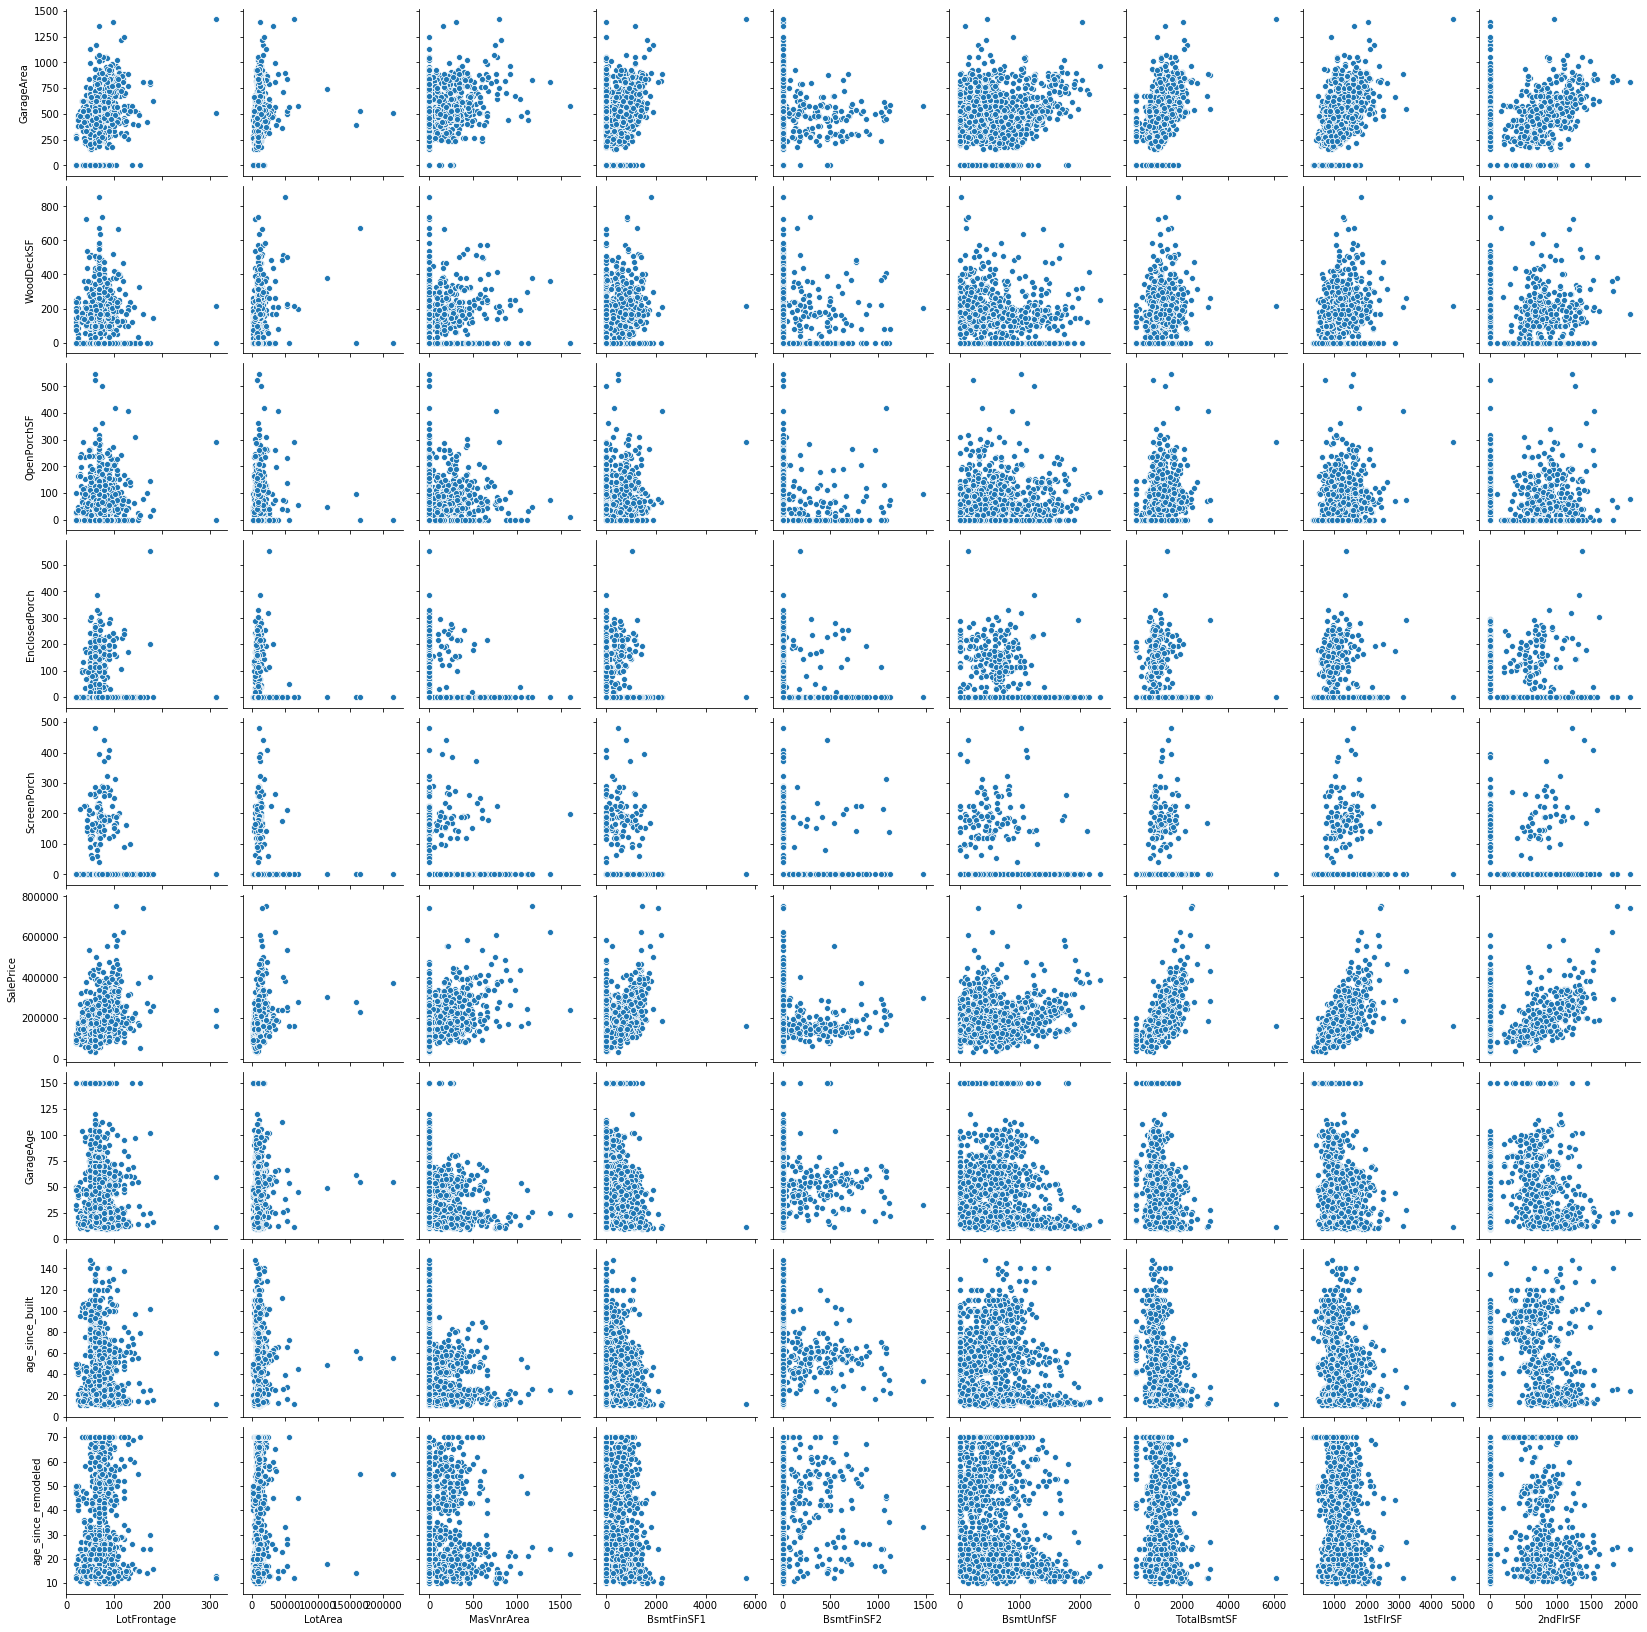

In [1025]:
# ploteed the pairwise scatter plots for Set1 on X axis and Set 2 on Y axis together  
sns.pairplot(df, x_vars=df_numerical1, y_vars=df_numerical2, kind='scatter')

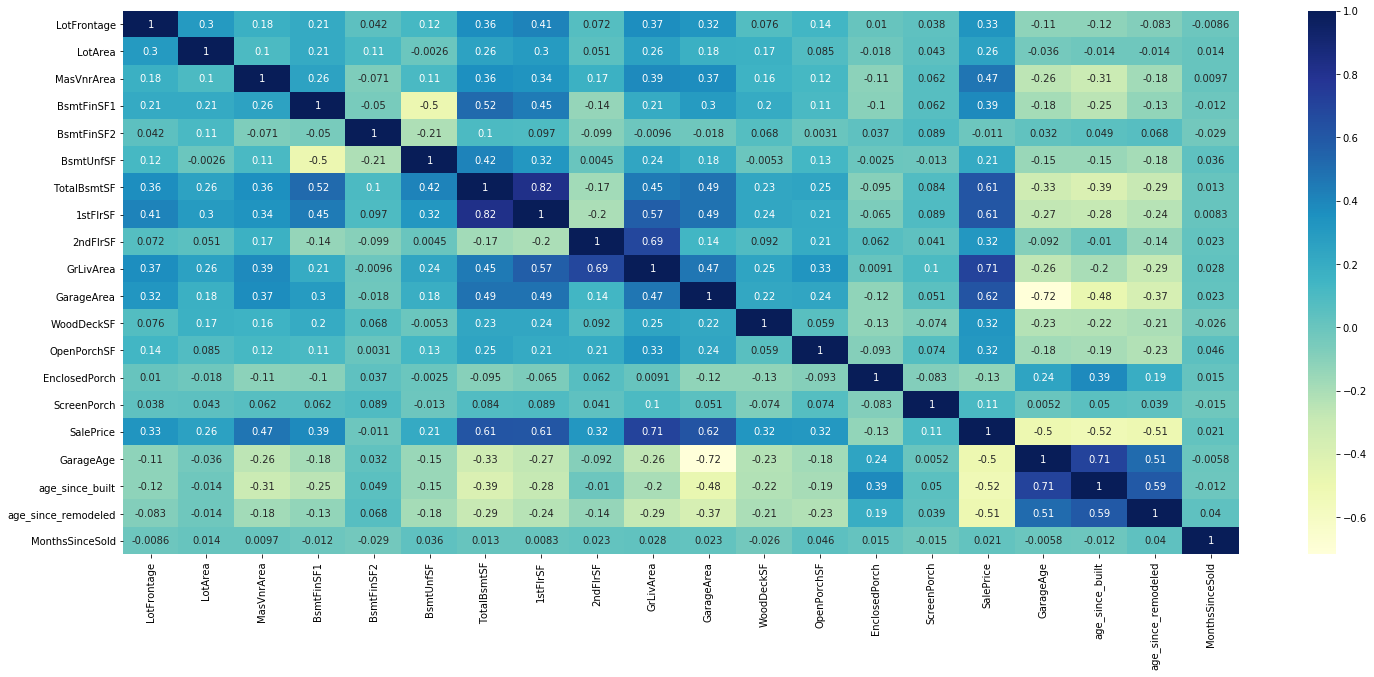

In [1026]:
# also plotted the heatmap for variables
plt.figure(figsize = (25, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

####  Observations from the pair plots and Correlation Chart
1. Folowing variables are better predictors of SalePrice <br>

> TotalBsmtSF,  <br>
> 1stFlrSF,  <br>
> GrLivArea,  <br>
> GarageArea  <br>
> MasVnrArea  <br>
> age_since_built  <br>
> age_since_remodeled  <br>
> GarageAge  <br>

2. Following variables are highly correlated. Since RFE doesn't work well with Correlated variables, lets drop one of the two - <br>

> TotalBsmtSF & 1stFlrSF  <br>
> GarageAge & age_since_built  <br>

In [1027]:
# Lets Drop 'GarageAge' & '1stFlrSF' as they are relatively less intuitive to be driving SalePrice

df.drop(['GarageAge', '1stFlrSF'], axis=1, inplace=True)

In [1028]:
# final numerical variable
df_numerical_final = list(df.describe().columns)

In [1029]:
# Lets evaluate Categorical variables
params_object1 =  list(df.select_dtypes(include='object').columns)
len(params_object1)

29

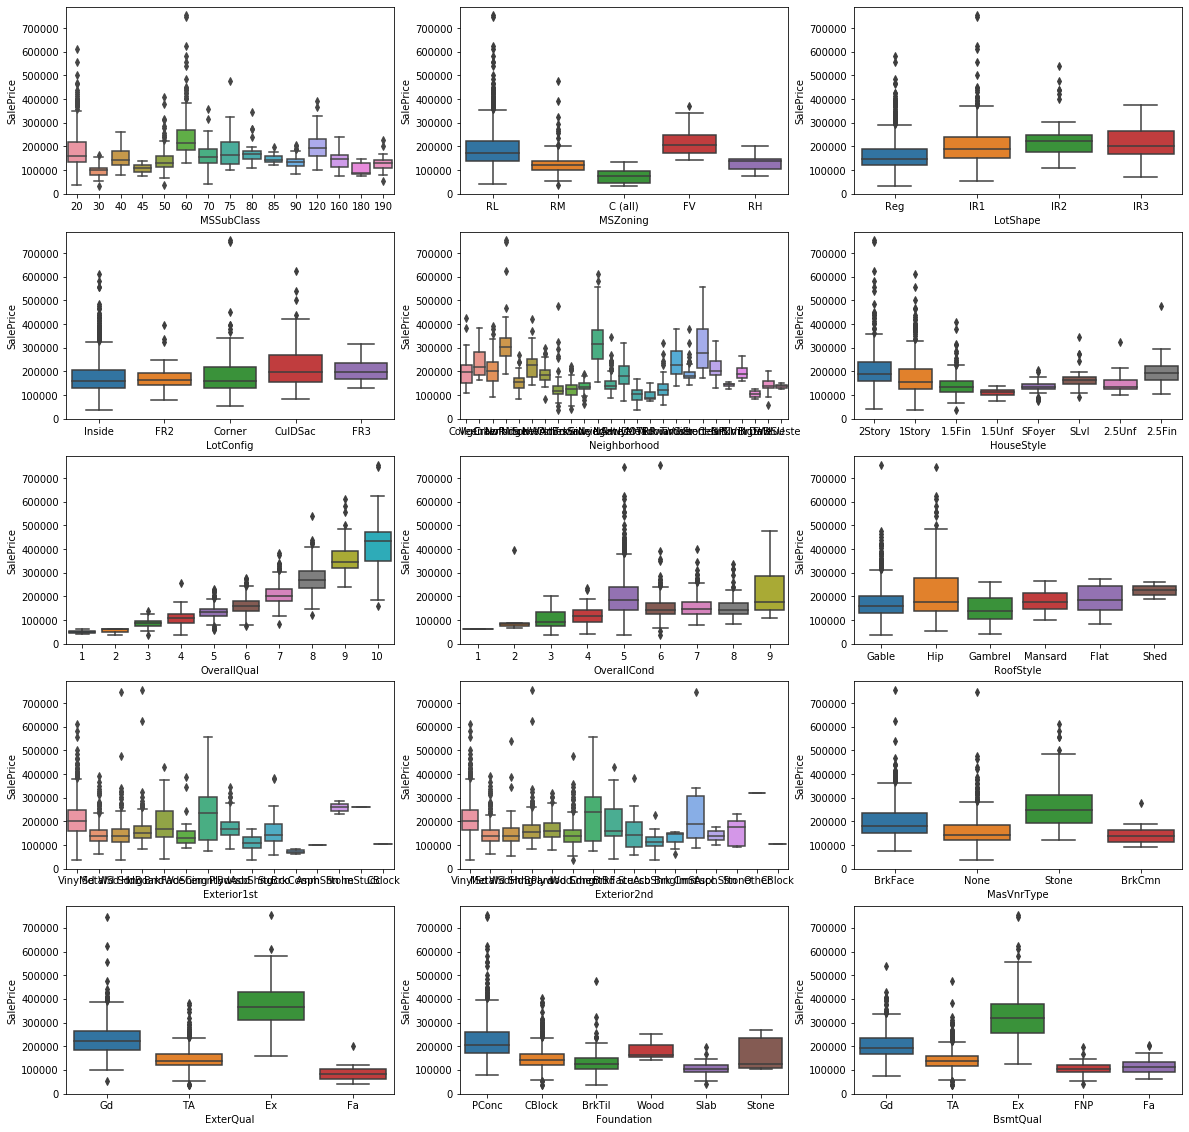

In [1030]:
#### visualizing categorical variables - the first 15 categorical

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(x = params_object1[0], y = 'SalePrice', data = df)
plt.subplot(5,3,2)
sns.boxplot(x = params_object1[1], y = 'SalePrice', data = df)
plt.subplot(5,3,3)
sns.boxplot(x = params_object1[2], y = 'SalePrice', data = df)
plt.subplot(5,3,4)
sns.boxplot(x = params_object1[3], y = 'SalePrice', data = df)
plt.subplot(5,3,5)
sns.boxplot(x = params_object1[4], y = 'SalePrice', data = df)
plt.subplot(5,3,6)
sns.boxplot(x = params_object1[5], y = 'SalePrice', data = df)
plt.subplot(5,3,7)
sns.boxplot(x = params_object1[6], y = 'SalePrice', data = df)
plt.subplot(5,3,8)
sns.boxplot(x = params_object1[7], y = 'SalePrice', data = df)
plt.subplot(5,3,9)
sns.boxplot(x = params_object1[8], y = 'SalePrice', data = df)
plt.subplot(5,3,10)
sns.boxplot(x = params_object1[9], y = 'SalePrice', data = df)
plt.subplot(5,3,11)
sns.boxplot(x = params_object1[10], y = 'SalePrice', data = df)
plt.subplot(5,3,12)
sns.boxplot(x = params_object1[11], y = 'SalePrice', data = df)
plt.subplot(5,3,13)
sns.boxplot(x = params_object1[12], y = 'SalePrice', data = df)
plt.subplot(5,3,14)
sns.boxplot(x = params_object1[13], y = 'SalePrice', data = df)
plt.subplot(5,3,15)
sns.boxplot(x = params_object1[14], y = 'SalePrice', data = df)

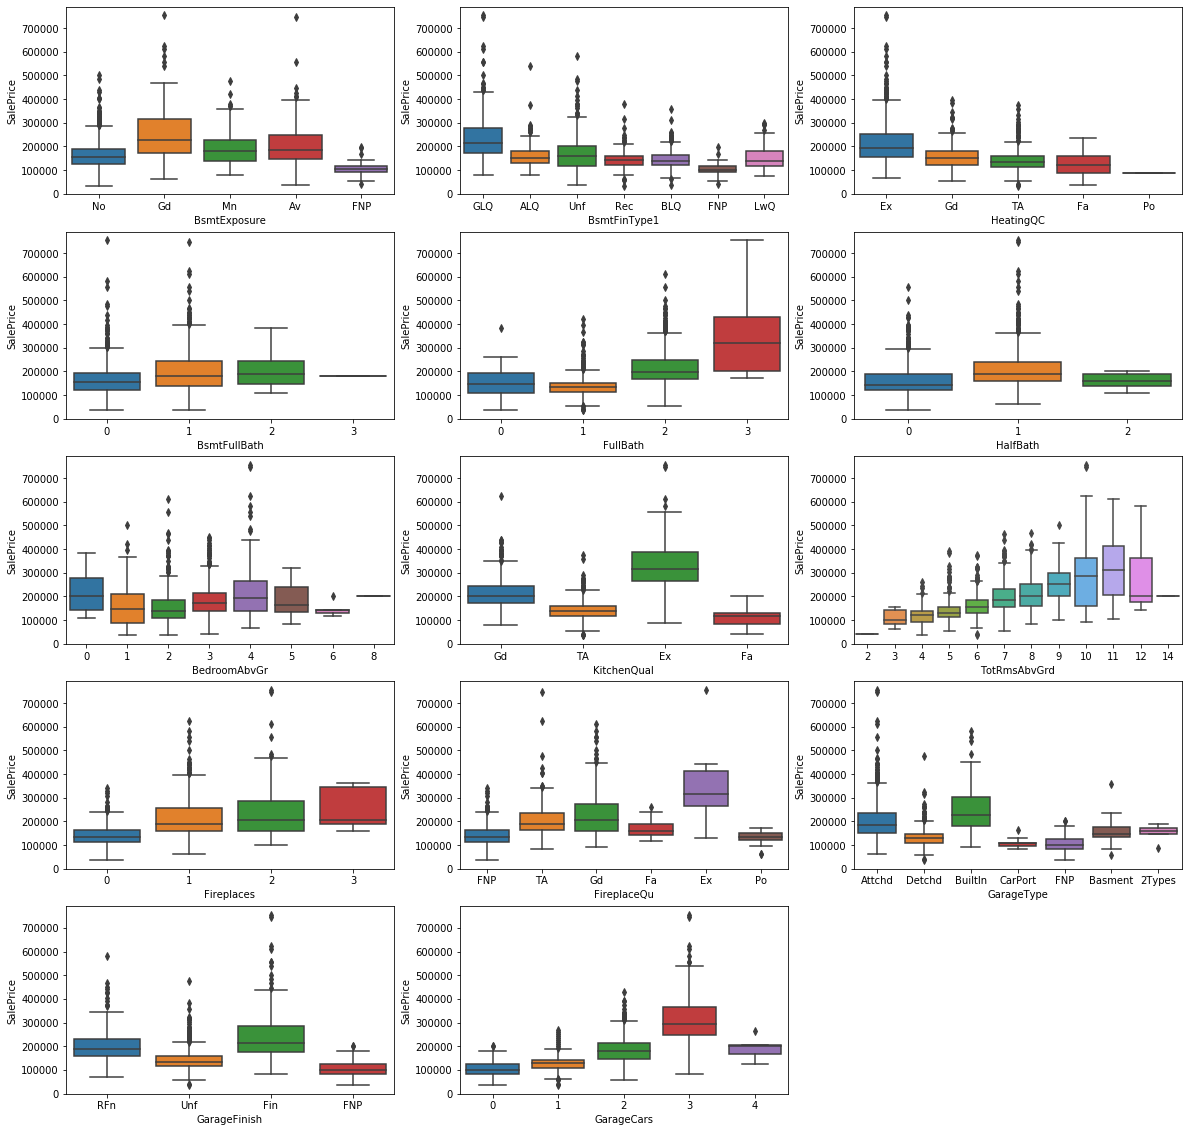

In [1031]:
#### visualizing categorical variables - the last 15 categorical

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(x = params_object1[15], y = 'SalePrice', data = df)
plt.subplot(5,3,2)
sns.boxplot(x = params_object1[16], y = 'SalePrice', data = df)
plt.subplot(5,3,3)
sns.boxplot(x = params_object1[17], y = 'SalePrice', data = df)
plt.subplot(5,3,4)
sns.boxplot(x = params_object1[18], y = 'SalePrice', data = df)
plt.subplot(5,3,5)
sns.boxplot(x = params_object1[19], y = 'SalePrice', data = df)
plt.subplot(5,3,6)
sns.boxplot(x = params_object1[20], y = 'SalePrice', data = df)
plt.subplot(5,3,7)
sns.boxplot(x = params_object1[21], y = 'SalePrice', data = df)
plt.subplot(5,3,8)
sns.boxplot(x = params_object1[22], y = 'SalePrice', data = df)
plt.subplot(5,3,9)
sns.boxplot(x = params_object1[23], y = 'SalePrice', data = df)
plt.subplot(5,3,10)
sns.boxplot(x = params_object1[24], y = 'SalePrice', data = df)
plt.subplot(5,3,11)
sns.boxplot(x = params_object1[25], y = 'SalePrice', data = df)
plt.subplot(5,3,12)
sns.boxplot(x = params_object1[26], y = 'SalePrice', data = df)
plt.subplot(5,3,13)
sns.boxplot(x = params_object1[27], y = 'SalePrice', data = df)
plt.subplot(5,3,14)
sns.boxplot(x = params_object1[28], y = 'SalePrice', data = df)

**Observation** - Categorical variables encoding insights from the above charts <br>

1. Variables having lot many categories - `Requires Grouping and One hot Encoding`

    1. MSSubClass
    2. Neighborhood
    3. Exterior1st
    4. Exterior2nd
    
2. Variables that are ordered with respect to driving the Target variable (SalePrice) - `Require data type conversion to int`
    
    1. OverallQual
    2. BsmtFullBath
    3. FullBath
    4. TotRmsAbvGrd
    5. Fireplaces
    6. OverallCond 
    7. HalfBath 
    8. BedroomAbvGr
    9. GarageCars 
    
3. Variables that are ordered with respect to driving the Target variable (SalePrice) - `Requires Integer Encoding`

    1. ExterQual
    2. HeatingQC
    3. KitchenQual
    4. GarageFinish  

4. Variables where there is no visible Order in the way they drive Target Variable (SalePrice) - `Requires One Hot Encoding`

    1. MSZoning
    2. LotShape
    3. LotConfig
    4. HouseStyle
    5. RoofStyle
    6. Foundation
    7. GarageType
    8. MasVnrType
    9. BsmtQual
    10. BsmtExposure
    11. BsmtFinType1
    12. FireplaceQu 

#### Step2  - Data Preparation

Objective: Creating dummy variables for the categorical variables <br>
Lets create dummy variables for the below <br>
Lets work with the first group: 

1. Variables having lot many categories - `Requires Grouping and one hot Encoding` <br>

    1. MSSubClass <br>
    2. Neighborhood <br>
    3. Exterior1st <br>
    4. Exterior2nd

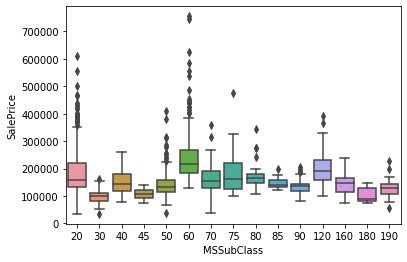

In [1032]:
# Variable 1 - MSSubClass
# Lets examine this variable
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)

In [1033]:
# Variable 1 - MSSubClass
# First group the variable by median of SalePrice 
df_1=df.groupby("MSSubClass")["SalePrice"].median()
# Create 3 groups 
df_11 = list(df_1.index[0:5])
df_12 = list(df_1.index[5:10])
df_13 = list(df_1.index[10:])

In [1034]:
# Checking the new created dataframe 
df_1

MSSubClass
20     159250
30      99900
40     142500
45     107500
50     132000
60     215200
70     156000
75     163500
80     166500
85     140750
90     135980
120    192000
160    146000
180     88500
190    128250
Name: SalePrice, dtype: int64

In [1035]:
# Rename df_11 with MSSa
# Rename df_12 with MSSb
# Rename df_13 with MSSc
df.MSSubClass = df.MSSubClass.replace(df_11, 'MSSa')
df.MSSubClass = df.MSSubClass.replace(df_12, 'MSSb')
df.MSSubClass = df.MSSubClass.replace(df_13, 'MSSc')

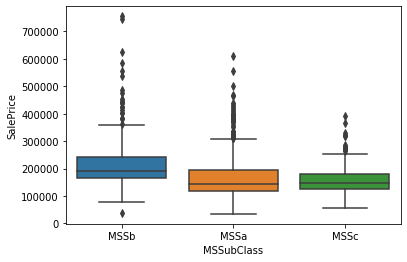

In [1036]:
# Checking the variable after grouping
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)

In [1037]:
# One hot Encoding Variable 1 - 'MSSubClass' and store it in a new variable - 'df_MSS'

df_MSS = pd.get_dummies(df['MSSubClass'], drop_first = True)


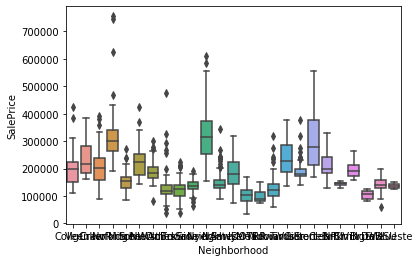

In [1038]:
# Variable 2 - Neighborhood
# Lets examine this variable
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)

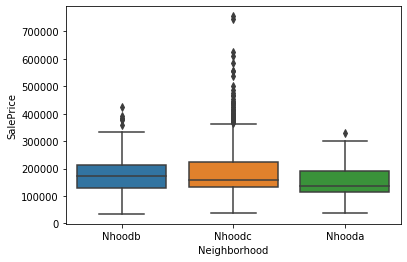

In [1039]:
# Variable 2 - Neighborhood
# First group the variable by median of SalePrice 
df_2=df.groupby("Neighborhood")["SalePrice"].median()
# Create 3 groups 
df_21 = list(df_2.index[0:5])
df_22 = list(df_2.index[5:10])
df_23 = list(df_2.index[10:])

# Rename df_21 with Nhooda
# Rename df_22 with Nhoodb
# Rename df_23 with Nhoodc
df.Neighborhood = df.Neighborhood.replace(df_21, 'Nhooda')
df.Neighborhood = df.Neighborhood.replace(df_22, 'Nhoodb')
df.Neighborhood = df.Neighborhood.replace(df_23, 'Nhoodc')

# Checking the variable after grouping
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
# One hot Encoding Variable 2 - 'Neighborhood' and store it in a new variable - 'df_Nhood'

df_Nhood = pd.get_dummies(df['Neighborhood'], drop_first = True)

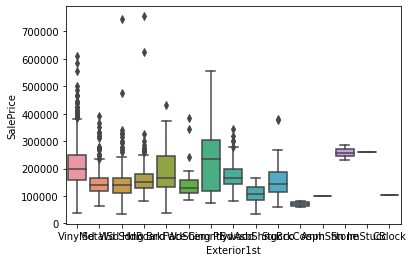

In [1040]:
# Variable 3 - Exterior1st
# Lets examine this variable
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df)

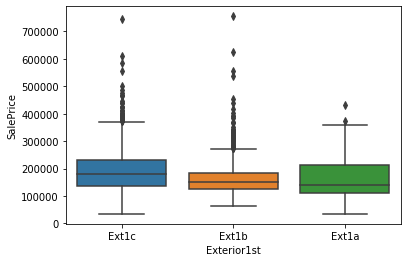

In [1041]:
# Variable 3 - Exterior1st
# First group the variable by median of SalePrice 
df_3=df.groupby("Exterior1st")["SalePrice"].median()
# Create 3 groups 
df_31 = list(df_3.index[0:5])
df_32 = list(df_3.index[5:10])
df_33 = list(df_3.index[10:])

# Rename df_31 with Ext1a
# Rename df_32 with Ext1b
# Rename df_33 with Ext1c
df.Exterior1st = df.Exterior1st.replace(df_31, 'Ext1a')
df.Exterior1st = df.Exterior1st.replace(df_32, 'Ext1b')
df.Exterior1st = df.Exterior1st.replace(df_33, 'Ext1c')

# Checking the variable after grouping
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df)
# One hot Encoding Variable 3 - 'Exterior1st' and store it in a new variable - 'df_Ext1'

df_Ext1 = pd.get_dummies(df['Exterior1st'], drop_first = True)

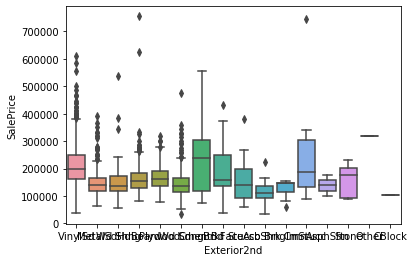

In [1042]:
# Variable 4 - Exterior2nd
# Lets examine this variable
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df)

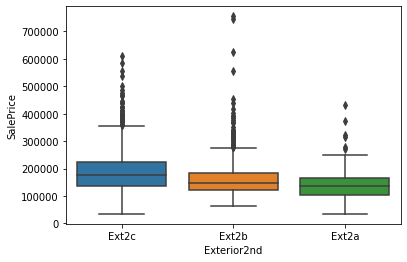

In [1043]:
# Variable 4 - Exterior2nd
# First group the variable by median of SalePrice 
df_4=df.groupby("Exterior2nd")["SalePrice"].median()
# Create 3 groups 
df_41 = list(df_4.index[0:5])
df_42 = list(df_4.index[5:10])
df_43 = list(df_4.index[10:])

# Rename df_41 with Ext2a
# Rename df_42 with Ext2b
# Rename df_43 with Ext2c
df.Exterior2nd = df.Exterior2nd.replace(df_41, 'Ext2a')
df.Exterior2nd = df.Exterior2nd.replace(df_42, 'Ext2b')
df.Exterior2nd = df.Exterior2nd.replace(df_43, 'Ext2c')

# Checking the variable after grouping
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df)
# One hot Encoding Variable 4 - 'Exterior2nd' and store it in a new variable - 'df_Ext2'

df_Ext2 = pd.get_dummies(df['Exterior2nd'], drop_first = True)

So, We created 4 Data frames for dummy variables - df_MSS, df_Nhood, df_Ext1, df_Ext1

In [1044]:
# concatenate the dummy variables created df_MSS, df_Nhood, df_Ext1, df_Ext1

df = pd.concat([df, df_MSS, df_Nhood, df_Ext1, df_Ext1], axis = 1)

In [1045]:
# Lets Drop 'MSSubClass','Neighborhood','Exterior1st','Exterior2nd'   

df.drop(['MSSubClass','Neighborhood','Exterior1st','Exterior2nd'], axis=1, inplace=True)

Lets work with the second set of variables for encoding 
2. Variables that are ordered with respect to driving the Target variable (SalePrice) - `Require data type conversion to int`
    
  1. OverallQual
    2. BsmtFullBath
    3. FullBath
    4. TotRmsAbvGrd
    5. Fireplaces
    6. OverallCond 
    7. HalfBath 
    8. BedroomAbvGr
    9. GarageCars 

In [1046]:
# Converted datatype to type int 
df.OverallQual = df.OverallQual.astype(int)
df.BsmtFullBath = df.BsmtFullBath.astype(int)
df.FullBath = df.FullBath.astype(int)
df.TotRmsAbvGrd = df.TotRmsAbvGrd.astype(int)
df.Fireplaces = df.Fireplaces.astype(int)
df.OverallCond = df.OverallCond.astype(int)
df.HalfBath = df.HalfBath.astype(int)
df.BedroomAbvGr = df.BedroomAbvGr.astype(int)
df.GarageCars = df.GarageCars.astype(int)

Lets work with the third set of  variables for encoding

3. Variables that are ordered with respect to driving the Target variable (SalePrice) - `Requires Integer Encoding`

    1. ExterQual
    2. HeatingQC
    3. KitchenQual
    4. GarageFinish 

In [1047]:
# Mapped different values of these variables to 0,1,2,.. etc. as per their relevance in driving SalePrice
df['ExterQual'] = df['ExterQual'].map({'Fa': 0, 'TA' : 1,'Gd': 2, 'Ex' : 3})
df['HeatingQC'] = df['HeatingQC'].map({'Po': 0,'Fa': 1, 'TA' : 2,'Gd': 3, 'Ex' : 4})
df['KitchenQual'] = df['KitchenQual'].map({'Fa': 0, 'TA' : 1,'Gd': 2, 'Ex' : 3})
df['GarageFinish'] = df['GarageFinish'].map({'FNP': 0, 'Unf' : 1,'RFn': 2, 'Fin' : 3})

4. Variables where there is no visible Order in the way they drive Target Variable (SalePrice) - `Requires One Hot Encoding`

    1. MSZoning
    2. LotShape
    3. LotConfig
    4. HouseStyle
    5. RoofStyle
    6. Foundation
    7. GarageType
    8. MasVnrType
    9. BsmtQual
    10. BsmtExposure
    11. BsmtFinType1
    12. FireplaceQu

In [1048]:
# Created dummies for these 12 variables
df_MSZ = pd.get_dummies(df['MSZoning'], drop_first = True)
df_LS = pd.get_dummies(df['LotShape'], drop_first = True)
df_LC = pd.get_dummies(df['LotConfig'], drop_first = True)
df_HS = pd.get_dummies(df['HouseStyle'], drop_first = True)

df_RS = pd.get_dummies(df['RoofStyle'], drop_first = True)
df_Fonda = pd.get_dummies(df['Foundation'], drop_first = True)


df_GT = pd.get_dummies(df['GarageType'], drop_first = True)
df_MVT = pd.get_dummies(df['MasVnrType'], drop_first = True)
df_BQL = pd.get_dummies(df['BsmtQual'], drop_first = True)
df_BEE = pd.get_dummies(df['BsmtExposure'], drop_first = True)
df_BFT = pd.get_dummies(df['BsmtFinType1'], drop_first = True)
df_FPQ = pd.get_dummies(df['FireplaceQu'], drop_first = True)


In [1049]:
# concatenate the dummy variables created 

df = pd.concat([df, df_MSZ, df_LS, df_LC, df_HS, df_RS, df_Fonda, df_GT, df_MVT, df_BQL, df_BEE, df_BFT, df_FPQ], axis = 1)

In [1050]:
# dropped the variables for which we created dummy variables

df.drop(['MSZoning', 'LotShape', 'LotConfig','HouseStyle', 'RoofStyle', 'Foundation','GarageType', 'MasVnrType', 'BsmtQual', 'BsmtExposure','BsmtFinType1', 'FireplaceQu'], axis=1, inplace=True)

In [1051]:
df.shape

(1460, 95)

#### Step3: Model Building

In [1052]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [1053]:
### creating X and y sets for model building

y = df.pop('SalePrice')
X = df

In [1054]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'age_since_built',
       'age_since_remodeled', 'MonthsSinceSold', 'MSSb', 'MSSc', 'Nhoodb',
       'Nhoodc', 'Ext1b', 'Ext1c', 'Ext1b', 'Ext1c', 'FV', 'RH', 'RL', 'RM',
       'IR2', 'IR3', 'Reg', 'CulDSac', 'FR2', 'FR3', 'Inside', '1.5Unf',
       '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'Gable',
       'Gambrel', 'Hip', 'Mansard', 'Shed', 'CBlock', 'PConc', 'Slab', 'Stone',
       'Wood', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'FNP',
       'BrkFace', 'None', 'Stone', 'FNP', 'Fa', 'Gd', 'TA', 'FNP', 'Gd', 'Mn',
       'No', 'BLQ', 'FN

In [1055]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [1056]:
# Now lets transform y_train for it to fit a normal distribution

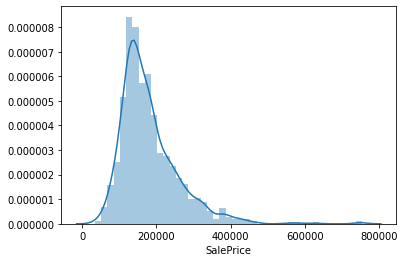

In [1057]:
# target variable: SalePrice
sns.distplot(y_train)
plt.show()

**Observation** - Long tail in y_train. so, we need to transform the target variable to better fit a normal distribution

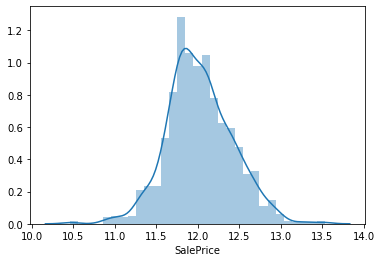

In [1058]:
# Performed log transformation of y_train to improve the y distribution
y_train_transformed = np.log(y_train)
sns.distplot(y_train_transformed)
plt.show()

In [1059]:
# Now lets leverage RFE to identify the top 40 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1060]:
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
lm.fit(X_train, y_train_transformed)

rfe = RFE(lm, 40)             
rfe = rfe.fit(X_train, y_train_transformed)

In [1061]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 44),
 ('ExterQual', False, 53),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('2ndFlrSF', False, 42),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 5),
 ('HalfBath', False, 11),
 ('BedroomAbvGr', False, 14),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 51),
 ('GarageFinish', False, 16),
 ('GarageCars', True, 1),
 ('GarageArea', False, 50),
 ('WoodDeckSF', False, 19),
 ('OpenPorchSF', False, 40),
 ('EnclosedPorch', False, 21),
 ('ScreenPorch', False, 17),
 ('age_since_built', True, 1),
 ('age_since_remodeled', True, 1),
 ('MonthsSinceSold', False, 22),
 ('MSSb', False, 8),
 ('MSSc', True, 1),
 ('Nhoodb', False, 15),
 ('Nhoodc', False, 36),
 ('Ext1b', True, 1),
 ('Ext1c', True, 1),
 ('Ext1b', True, 1),
 ('Ext1c', True, 

In [1062]:
# top 40 columns that are relevant as per RFE
col_RFE = X_train.columns[rfe.support_]
col_RFE

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars',
       'age_since_built', 'age_since_remodeled', 'MSSc', 'Ext1b', 'Ext1c',
       'Ext1b', 'Ext1c', 'FV', 'RH', 'RL', 'RM', 'IR3', '2Story', 'Gable',
       'Hip', 'PConc', 'Attchd', 'FNP', 'Fa', 'Gd', 'TA', 'FNP', 'Gd', 'FNP',
       'Unf', 'FNP'],
      dtype='object')

In [1063]:
# Creating X_train_rfe dataframe leveraging the variable selected in RFE. 

X_train_rfe = X_train[col_RFE]

#### Ridge and Lasso Regression

Let's now try predicting prices using ridge and lasso regression.

#### Ridge Regression

In [1064]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor

In [1065]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 16.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train_transformed) 

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 16.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1066]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001995,1.784161e-07,0.001197,3.989936e-04,0.0001,{'alpha': 0.0001},-0.102016,-0.101157,-0.102549,-0.090406,-0.095502,-0.098326,0.004694,22,-0.094361,-0.082756,-0.090261,-0.095394,-0.094735,-0.091501,0.004729
1,0.001795,3.988982e-04,0.000599,4.886946e-04,0.001,{'alpha': 0.001},-0.102016,-0.101157,-0.102549,-0.090405,-0.095503,-0.098326,0.004694,21,-0.094361,-0.082756,-0.090261,-0.095394,-0.094735,-0.091501,0.004729
2,0.001596,4.887335e-04,0.000601,4.910170e-04,0.01,{'alpha': 0.01},-0.102014,-0.101157,-0.102550,-0.090402,-0.095504,-0.098325,0.004695,20,-0.094361,-0.082756,-0.090260,-0.095394,-0.094735,-0.091501,0.004729
3,0.000997,1.907349e-07,0.000997,3.989506e-07,0.05,{'alpha': 0.05},-0.102006,-0.101157,-0.102552,-0.090387,-0.095508,-0.098322,0.004699,19,-0.094361,-0.082758,-0.090257,-0.095396,-0.094735,-0.091501,0.004729
4,0.001597,4.894417e-04,0.000996,2.259826e-06,0.1,{'alpha': 0.1},-0.101995,-0.101157,-0.102556,-0.090368,-0.095514,-0.098318,0.004703,18,-0.094361,-0.082760,-0.090253,-0.095397,-0.094735,-0.091501,0.004728


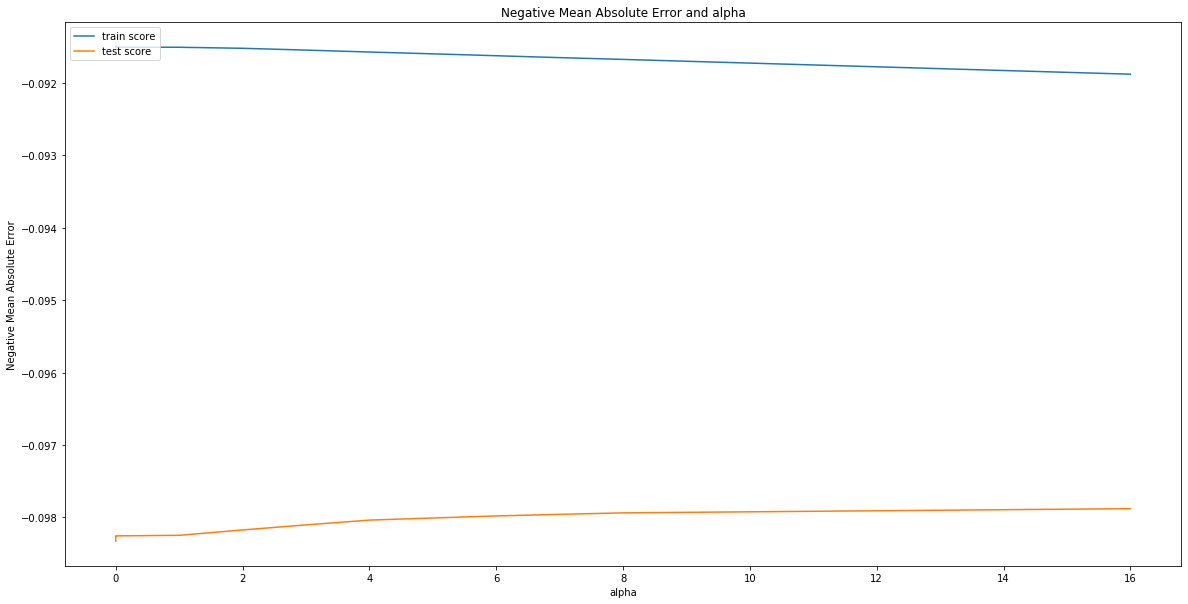

In [1067]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1068]:
# Best estimator of alpha
model_cv.best_estimator_

Ridge(alpha=16.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1069]:
# alpha = 8
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train_transformed)
ridge.coef_

array([-0.01333744,  0.02365597,  0.0911146 ,  0.04815185, -0.00450273,
       -0.00076946,  0.01063583,  0.00574829,  0.01375339,  0.10412771,
        0.02722441,  0.01911772,  0.02593864,  0.05574897, -0.05398592,
       -0.01998397, -0.02373383, -0.0039895 , -0.0039895 , -0.00517249,
       -0.00517249, -0.0039895 , -0.0039895 , -0.00517249, -0.00517249,
        0.0695986 ,  0.0311637 ,  0.11691681,  0.06985547, -0.0148353 ,
       -0.01221325, -0.01813232, -0.01388766,  0.01562868,  0.02173806,
        0.00117855, -0.00252555, -0.00307667, -0.00252555, -0.00671696,
       -0.01531008,  0.00240292, -0.02044949,  0.00957438,  0.00591605,
       -0.0531441 ,  0.0033744 ,  0.00117855, -0.00252555, -0.00307667,
       -0.00252555, -0.00671696, -0.02044949,  0.00957438,  0.00591605,
        0.00117855, -0.00252555, -0.00307667, -0.00252555, -0.00671696,
       -0.02898321,  0.00117855, -0.00252555, -0.00307667, -0.00252555,
       -0.00671696])

In [1070]:
# Creating X_test_rfe dataframe leveraging the variable selected in RFE. 

X_test_rfe = X_test[col_RFE] # created X_test_rfe leveraging the variables identified during the rfe process
y_pred = ridge.predict(X_test_rfe)
y_test_transformed = np.log(y_test) # performed log transformation of y_test

In [1071]:
# R2 score

from sklearn.metrics import median_absolute_error, r2_score

r2_score(y_test_transformed, y_pred)

0.880487020162652

In [1072]:
model_parameters = list(ridge.coef_)  
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")

list1 = list(zip(cols, model_parameters))
list1.sort(key = lambda x: x[1]) 
print(list1)

[('age_since_built', -0.054), ('TA', -0.053), ('Unf', -0.029), ('MSSc', -0.024), ('age_since_remodeled', -0.02), ('Gd', -0.02), ('Gd', -0.02), ('Gable', -0.018), ('IR3', -0.015), ('Fa', -0.015), ('Hip', -0.014), ('LotFrontage', -0.013), ('2Story', -0.012), ('FNP', -0.007), ('FNP', -0.007), ('FNP', -0.007), ('FNP', -0.007), ('BsmtFinSF1', -0.005), ('Ext1c', -0.005), ('Ext1c', -0.005), ('Ext1c', -0.005), ('Ext1c', -0.005), ('Ext1b', -0.004), ('Ext1b', -0.004), ('Ext1b', -0.004), ('Ext1b', -0.004), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('FNP', -0.003), ('BsmtFinSF2', -0.001), ('FNP', 0.001), ('FNP', 0.001), ('FNP', 0.001), ('FNP', 0.001), ('Fa', 0.002), ('TA', 0.003), ('TotalBsmtSF', 0.006), ('Gd', 0.006), ('Gd', 0.006), ('Gd', 0.01), ('Gd', 0.01), ('BsmtUnfSF', 0.011), ('HeatingQC', 0.014), ('PConc', 0.016), ('KitchenQual', 0.019), ('Attchd'

In [1073]:
# So, the top 10 features as per Ridge ar as below - 
top10_ridge = ''
for i in range(2,12): # iterable of size 10
    #print(list1[-i][0])
    top10_ridge = top10_ridge + ' ' + str(list1[-i][0])
top10_ridge = top10_ridge.split()
print(top10_ridge)

['RL', 'GrLivArea', 'OverallQual', 'RM', 'FV', 'GarageCars', 'OverallCond', 'RH', 'BsmtFullBath', 'TotRmsAbvGrd']


#### Lasso

In [1074]:
lasso = Lasso()

# list of alphas to tune
params1 = {'alpha': [0.0001, 0.0003, 0.0005, 0.0008,  0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0050]}
# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train_rfe, y_train_transformed) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0003, 0.0005, 0.0008, 0.001,
                                   0.0015, 0.002, 0.0025, 0.003, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1075]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007788,0.002122,0.000988,1.767028e-05,0.0001,{'alpha': 0.0001},-0.101767,-0.101057,-0.102472,-0.090005,-0.095437,-0.098148,0.004773,10,-0.094251,-0.082745,-0.090132,-0.095289,-0.094637,-0.091411,0.004696
1,0.007987,0.000893,0.001196,3.994974e-04,0.0003,{'alpha': 0.0003},-0.101348,-0.100596,-0.102297,-0.089216,-0.095403,-0.097772,0.004900,9,-0.094094,-0.082738,-0.090063,-0.095106,-0.094538,-0.091308,0.004639
2,0.007581,0.001353,0.000997,7.747687e-07,0.0005,{'alpha': 0.0005},-0.100949,-0.100247,-0.102163,-0.088472,-0.095507,-0.097468,0.005033,8,-0.093967,-0.082778,-0.090118,-0.095011,-0.094632,-0.091301,0.004605
3,0.006782,0.000978,0.000997,3.693565e-07,0.0008,{'alpha': 0.0008},-0.100322,-0.099845,-0.102337,-0.088087,-0.095692,-0.097257,0.005068,7,-0.093756,-0.083036,-0.090421,-0.094983,-0.094759,-0.091391,0.004485
4,0.006582,0.001017,0.001197,3.991130e-04,0.001,{'alpha': 0.001},-0.099905,-0.099621,-0.102508,-0.088201,-0.095864,-0.097220,0.004982,6,-0.093674,-0.083245,-0.090535,-0.095000,-0.094864,-0.091464,0.004413


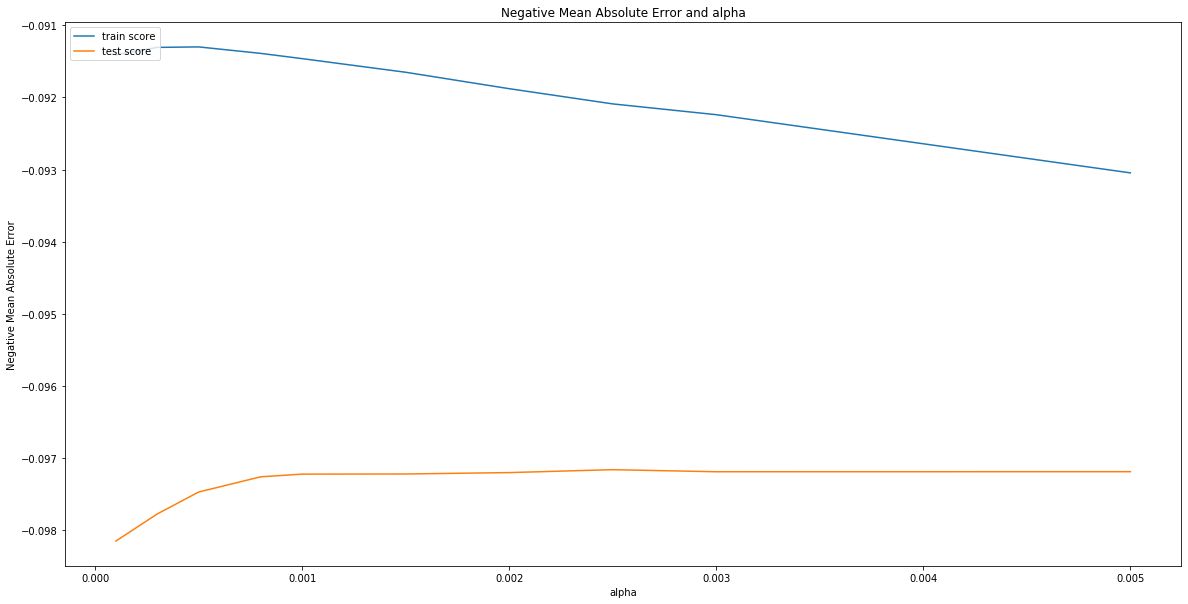

In [1076]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20, 10))
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()



In [1077]:
# Best estimator of alpha
model_cv1.best_estimator_

Lasso(alpha=0.0025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1078]:
alpha =0.0025

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train_transformed) 

Lasso(alpha=0.0025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1079]:
lasso.coef_

array([-6.81203340e-03,  2.09773011e-02,  1.00512465e-01,  4.50804770e-02,
       -0.00000000e+00,  0.00000000e+00,  3.98041727e-03,  1.52156435e-02,
        1.29904331e-02,  9.93575370e-02,  2.48828585e-02,  2.07722504e-02,
        2.28483968e-02,  5.15993118e-02, -5.43447928e-02, -2.05796494e-02,
       -1.85727569e-02,  0.00000000e+00,  0.00000000e+00, -1.26538625e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.63045510e-02,  8.90794236e-03,  3.81902739e-02,
        0.00000000e+00, -1.44669369e-02, -5.76404569e-03, -2.96434183e-03,
        0.00000000e+00,  1.44848508e-02,  1.94629805e-02,  0.00000000e+00,
       -1.72850301e-03, -9.79920937e-03, -0.00000000e+00, -2.95450362e-02,
       -2.12531858e-03,  0.00000000e+00, -2.02206910e-04,  1.87577457e-02,
        8.75348254e-03, -1.94716545e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.33158157e-03, -0.00000000e+00, -3.23325836e-04,
       -1.27397480e-02,  

In [1080]:
#Creating X_test_rfe dataframe leveraging the variable selected in RFE. 

#X_test_rfe = X_test[col_RFE] # created X_test_rfe leveraging the variables identified during the rfe process
y_pred = lasso.predict(X_test_rfe)
y_test_transformed = np.log(y_test) # performed log transformation of y_test

In [1081]:
# R2 score

from sklearn.metrics import median_absolute_error, r2_score

r2_score(y_test_transformed, y_pred)

0.8785779145802226

In [1082]:
model_parameters1 = list(lasso.coef_)  
model_parameters1.insert(0, lasso.intercept_)
model_parameters1 = [round(x, 3) for x in model_parameters1]
cols1 = X_train_rfe.columns
cols1 = cols1.insert(0, "constant")

list2 = list(zip(cols1, model_parameters1))
list2.sort(key = lambda x: x[1]) 
print(list2)

[('age_since_built', -0.054), ('FNP', -0.03), ('age_since_remodeled', -0.021), ('Unf', -0.021), ('MSSc', -0.019), ('TA', -0.019), ('IR3', -0.014), ('Gd', -0.013), ('FNP', -0.01), ('LotFrontage', -0.007), ('2Story', -0.006), ('Gable', -0.003), ('FNP', -0.002), ('Fa', -0.002), ('Ext1c', -0.001), ('FNP', -0.001), ('FNP', -0.001), ('FNP', -0.001), ('BsmtFinSF1', -0.0), ('BsmtFinSF2', 0.0), ('Ext1b', 0.0), ('Ext1b', 0.0), ('Ext1c', -0.0), ('Ext1b', 0.0), ('Ext1b', 0.0), ('Ext1c', -0.0), ('Ext1c', -0.0), ('RM', 0.0), ('Hip', 0.0), ('FNP', 0.0), ('FNP', -0.0), ('Fa', 0.0), ('Gd', -0.0), ('TA', -0.0), ('FNP', 0.0), ('FNP', -0.0), ('FNP', -0.0), ('FNP', -0.0), ('Gd', 0.0), ('Gd', 0.0), ('FNP', 0.0), ('FNP', -0.0), ('FNP', -0.0), ('FNP', -0.0), ('FNP', 0.0), ('FNP', -0.0), ('FNP', -0.0), ('FNP', -0.0), ('BsmtUnfSF', 0.004), ('RH', 0.009), ('Gd', 0.009), ('HeatingQC', 0.013), ('PConc', 0.014), ('TotalBsmtSF', 0.015), ('Attchd', 0.019), ('Gd', 0.019), ('LotArea', 0.021), ('KitchenQual', 0.021), ('

In [1083]:
# So, the top 10 features as per Lasso ar as below - 
top10_lasso = ''
for i in range(2,12): # iterable of size 10
    #print(list2[-i][0])
    top10_lasso = top10_lasso + ' ' + str(list2[-i][0])
top10_lasso = top10_lasso.split()
print(top10_lasso)

['OverallQual', 'GrLivArea', 'GarageCars', 'OverallCond', 'RL', 'FV', 'BsmtFullBath', 'TotRmsAbvGrd', 'KitchenQual', 'LotArea']


In [755]:
y_pred = lasso.predict(X_test_rfe)
r2_score(y_test_transformed, y_pred)

0.8763237217196689